# 東京の交通ネットワークを表示する

to do: tokyo_visualizeの前半部分を改変してX,Y座標で表示する範囲を指定するようにした

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import networkx as nx

In [3]:
## Graph import
df = pd.read_csv("Tokyo_Edgelist.csv")

## Normalization of coords ##
info = df.values
X_min, X_max, Y_min, Y_max = min(info[:,0]), max(info[:,0]), min(info[:,1]), max(info[:,1])
delta_X, delta_Y = (X_max - X_min), (Y_max - Y_min)
X_cor, Y_cor = info[:,0], info[:,1]
X_norm, Y_norm = (X_cor - X_min) / delta_X, (Y_cor - Y_min)/ delta_Y 
info[:,0] = X_norm
info[:,1] = Y_norm


In [4]:
df.head()

,XCoord,YCoord,START_NODE,END_NODE,EDGE,LENGTH
0,360665.2989,3931565.547,1,2,1,113.876845
1,360665.2989,3931565.547,1,110218,55109,1.386002
2,360665.2989,3931565.547,1,109833,55110,264.898501
3,360665.2989,3931565.547,1,110273,55137,56.376211
4,360591.8081,3931652.154,2,1,1,113.876845


In [5]:
info

array([[5.11780795e-01, 8.26841228e-02, 1.00000000e+00, 2.00000000e+00,
        1.00000000e+00, 1.13876845e+02],
       [5.11780795e-01, 8.26841228e-02, 1.00000000e+00, 1.10218000e+05,
        5.51090000e+04, 1.38600200e+00],
       [5.11780795e-01, 8.26841228e-02, 1.00000000e+00, 1.09833000e+05,
        5.51100000e+04, 2.64898501e+02],
       ...,
       [3.14727837e-01, 3.35920892e-01, 1.03162400e+06, 1.01414800e+06,
        5.14727000e+05, 3.57786334e+03],
       [3.14727837e-01, 3.35920892e-01, 1.03162400e+06, 1.02945400e+06,
        5.14727000e+05, 3.57786334e+03],
       [3.14727837e-01, 3.35920892e-01, 1.03162400e+06, 1.01416000e+06,
        5.15812000e+05, 1.64182942e+02]])

In [6]:
#nodeSort = nodeSort[np.argsort(nodeSort[:, 0])]
#nodeSort.shape
print(info[np.argsort(info[:,1])])

[[7.02837692e-01 0.00000000e+00 1.01078400e+06 1.01078300e+06
  5.05392000e+05 2.26522436e+03]
 [7.25335722e-01 1.93883360e-02 1.01078300e+06 1.01078400e+06
  5.05392000e+05 2.26522436e+03]
 [7.26630620e-01 2.04742875e-02 1.01093400e+06 1.01093300e+06
  5.05467000e+05 8.27728889e+03]
 ...
 [8.36707718e-02 9.91026810e-01 5.87450000e+05 5.87440000e+05
  2.93725000e+05 1.00049986e+03]
 [7.14240279e-02 1.00000000e+00 5.87451000e+05 5.87447000e+05
  2.93727000e+05 1.00046686e+03]
 [7.14240279e-02 1.00000000e+00 5.87451000e+05 5.87447000e+05
  2.93726000e+05 1.00046686e+03]]


In [7]:
### Extract vertices within fixed coordinate ###
def extract(x_low, x_high, y_low, y_high):
    info_ = info[np.where( (info[:,0] >= x_low)&(info[:,0] <= x_high)&(info[:,1] >= y_low)&(info[:,1] <= y_high) )]
    nodeList = info_[:,2]
    ##--Next omit edges that connects outside the Region of Interest --##
    nodeSort = np.zeros((0,6))
    for line in range(len(info_[:,0])):
        if info_[line,3] in nodeList:
            nodeSort = np.append(nodeSort, np.array([info_[line,:]]), axis = 0)
    
    return nodeSort
#nodeSort = extract(0.50, 0.55, 0.05, 0.10) ## 範囲を広くすると計算にめちゃくちゃ時間がかかる！！ 最初に気に入ったやつは (0.50, 0.55, 0.05, 0.10) でやった

In [37]:
#nodeSort = extract(0.1, 0.15, 0.75, 0.8) # X軸は東西方向(小さい方が西側、同様にY軸は南北方向) : これは西側やるとき
#nodeSort = extract(0.50, 0.55, 0.05, 0.1) #前のゼミ発表ではこの辺をやった。
#nodeSort = extract(0.70, 0.86, 0.40, 0.56) #20200602にテスト: このくらいの幅でやっちゃうとどうやらノードがでかすぎてNWが見えなくなる。ちなみに皇居から新宿
#nodeSort = extract(0.64, 0.67, 0.42, 0.46) #高井戸の近く
#nodeSort = extract(0.65, 0.67, 0.43, 0.45)
nodeSort = extract(0.65, 0.67, 0.43, 0.45)

nodeSort

array([[6.58740952e-01, 4.30033460e-01, 3.56223000e+05, 3.58006000e+05,
        1.79005000e+05, 1.34625724e+02],
       [6.58740952e-01, 4.30033460e-01, 3.56223000e+05, 3.58021000e+05,
        1.79011000e+05, 4.60698030e+01],
       [6.52547864e-01, 4.30125421e-01, 3.56427000e+05, 3.56969000e+05,
        1.78485000e+05, 1.73802660e+01],
       ...,
       [6.58111294e-01, 4.47478831e-01, 1.01933100e+06, 3.89236000e+05,
        1.94723000e+05, 5.79259540e+01],
       [6.58111294e-01, 4.47478831e-01, 1.01933100e+06, 3.89443000e+05,
        1.94723000e+05, 5.79259540e+01],
       [6.58111294e-01, 4.47478831e-01, 1.01933100e+06, 1.01932800e+06,
        5.09666000e+05, 8.34389700e+00]])

In [38]:
# リンク情報のみを反映させたグラフを作成
edges = nodeSort[:,2:4].astype("int32")

np.savetxt("edges_2.txt", edges, fmt = '%d')
# int型を指定しないとノード名（ラベル）を単純な数値にしてくれない
#今重みは整数値のまま入っている
G = nx.read_edgelist("edges_2.txt", nodetype=int)


In [39]:
## ここから座標関係
# 座標情報をndarray型として読み込む
coords = nodeSort[:,:2]
nodeName = nodeSort[:,2]
np.savetxt("coords.csv", coords, delimiter = ",")
## arrayのままでも動くので訂正 2013.05.07
# 座標情報は辞書型で表す
pos = {}
# ndarrayの情報を「(x,y)」という値に変換する
for i in range(len(coords) ):
    if i != 0 and (coords[i][0], coords[i][1]) == (coords[i-1][0], coords[i-1][1]):
        pass
    else:
        pos[int(nodeName[i])] = (coords[i][0], coords[i][1])

In [43]:
pos

{356223: (0.6587409524631459, 0.4300334602599317),
 356427: (0.6525478636898853, 0.4301254207470639),
 356549: (0.6693143301823857, 0.43018968177647554),
 356562: (0.6649625314473817, 0.4301993787272878),
 356652: (0.6539832121727599, 0.4302473711416526),
 356686: (0.6661697713815194, 0.4302718596885017),
 356706: (0.6698579738713064, 0.4302860305084461),
 356763: (0.6665245252038668, 0.43032653079748073),
 356784: (0.6636061422126223, 0.4303331238677713),
 356900: (0.6607137903867054, 0.43040967198276436),
 356969: (0.6524432514210519, 0.43043749987692054),
 357003: (0.6551864174587102, 0.43046408621886206),
 357118: (0.6564040176705999, 0.43052843287257747),
 357131: (0.6516495535278103, 0.4305334847056601),
 357437: (0.6593971793112213, 0.43069893223942546),
 357509: (0.6650600706429194, 0.4307407811110145),
 357524: (0.6565451374795424, 0.43074375655507063),
 357558: (0.6544395298876579, 0.43075940439401517),
 357628: (0.6649334032555886, 0.4307900792958018),
 357690: (0.6567923555

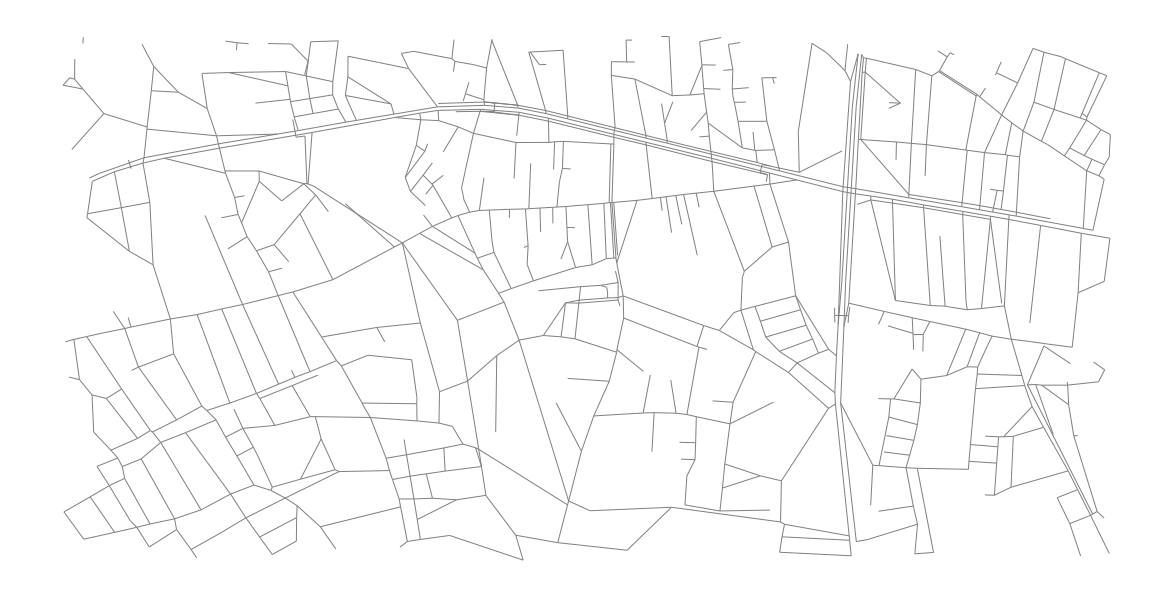

In [40]:
## ここから描画関係

# 描画
#nx.draw(G, pos)
plt.figure(figsize=((16,8)))
nx.draw(G, pos, node_size = 0, node_color = "b", edge_color="gray")
plt.grid()

# 保存
plt.savefig("test_fig_0602.jpg")

plt.show()

●上のネットワークを見て気に入ったらこのネットワークを計算に使える形にして保存

In [41]:
df1 = pd.DataFrame(nodeSort)
df1.columns = df.columns
df1.to_csv("networkData.csv", sep = ',')

# 辞書の保存
import pickle

def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)
pickle_dump(pos, "positionDict.pickle")

In [42]:
pos

{356223: (0.6587409524631459, 0.4300334602599317),
 356427: (0.6525478636898853, 0.4301254207470639),
 356549: (0.6693143301823857, 0.43018968177647554),
 356562: (0.6649625314473817, 0.4301993787272878),
 356652: (0.6539832121727599, 0.4302473711416526),
 356686: (0.6661697713815194, 0.4302718596885017),
 356706: (0.6698579738713064, 0.4302860305084461),
 356763: (0.6665245252038668, 0.43032653079748073),
 356784: (0.6636061422126223, 0.4303331238677713),
 356900: (0.6607137903867054, 0.43040967198276436),
 356969: (0.6524432514210519, 0.43043749987692054),
 357003: (0.6551864174587102, 0.43046408621886206),
 357118: (0.6564040176705999, 0.43052843287257747),
 357131: (0.6516495535278103, 0.4305334847056601),
 357437: (0.6593971793112213, 0.43069893223942546),
 357509: (0.6650600706429194, 0.4307407811110145),
 357524: (0.6565451374795424, 0.43074375655507063),
 357558: (0.6544395298876579, 0.43075940439401517),
 357628: (0.6649334032555886, 0.4307900792958018),
 357690: (0.6567923555

In [35]:
nodeSort

array([[6.69768116e-01, 4.45102757e-01, 3.84870000e+05, 3.85221000e+05,
        1.92612000e+05, 2.36487460e+01],
       [6.69768116e-01, 4.45102757e-01, 3.84870000e+05, 3.85342000e+05,
        1.92671000e+05, 1.53973410e+01],
       [6.69529807e-01, 4.45311103e-01, 3.85221000e+05, 3.84870000e+05,
        1.92612000e+05, 2.36487460e+01],
       [6.69529807e-01, 4.45311103e-01, 3.85221000e+05, 3.85508000e+05,
        1.92754000e+05, 1.49787300e+01],
       [6.69855946e-01, 4.45385103e-01, 3.85342000e+05, 3.84870000e+05,
        1.92671000e+05, 1.53973410e+01],
       [6.69855946e-01, 4.45385103e-01, 3.85342000e+05, 3.87043000e+05,
        1.93522000e+05, 5.57492830e+01],
       [6.68157607e-01, 4.45402892e-01, 3.85392000e+05, 3.85525000e+05,
        1.92764000e+05, 2.11340020e+01],
       [6.68157607e-01, 4.45402892e-01, 3.85392000e+05, 3.87230000e+05,
        1.93615000e+05, 4.63315540e+01],
       [6.69005260e-01, 4.45440096e-01, 3.85486000e+05, 3.86018000e+05,
        1.93009000e+05, 

In [36]:
df1

,XCoord,YCoord,START_NODE,END_NODE,EDGE,LENGTH
0,0.669768,0.445103,384870.0,385221.0,192612.0,23.648746
1,0.669768,0.445103,384870.0,385342.0,192671.0,15.397341
2,0.669530,0.445311,385221.0,384870.0,192612.0,23.648746
3,0.669530,0.445311,385221.0,385508.0,192754.0,14.978730
4,0.669856,0.445385,385342.0,384870.0,192671.0,15.397341
5,0.669856,0.445385,385342.0,387043.0,193522.0,55.749283
6,0.668158,0.445403,385392.0,385525.0,192764.0,21.134002
7,0.668158,0.445403,385392.0,387230.0,193615.0,46.331554
8,0.669005,0.445440,385486.0,386018.0,193009.0,16.881062
9,0.669005,0.445440,385486.0,386296.0,193148.0,35.031529
